In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/video-games-sales/video_games_sales.csv')

In [3]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df2 = df.groupby(['genre'])['global_sales'].sum().reset_index()
df2 = df2.sort_values(by='global_sales', ascending=False).head(13)
df2

,genre,global_sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


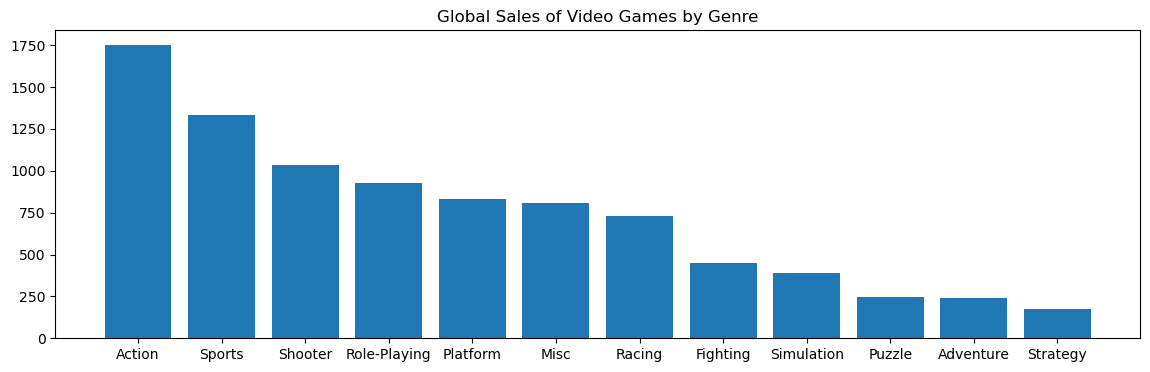

In [6]:
gen = df2['genre']
g_sales = df2['global_sales']

plt.figure(figsize=(14,4))

plt.bar(gen, g_sales)
#plt.xticks(gen, rotation='vertical')
plt.title("Global Sales of Video Games by Genre")
plt.show()

In [7]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [9]:
df.dtypes

rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

In [10]:
action = df.query('genre == "Action"')
action = action[['platform', 'year', 'global_sales']]
action.groupby(['year'])['global_sales'].sum()

year
1980.0      0.34
1981.0     14.84
1982.0      6.52
1983.0      2.86
1984.0      1.85
1985.0      3.52
1986.0     13.74
1987.0      1.12
1988.0      1.75
1989.0      4.64
1990.0      6.39
1991.0      6.76
1992.0      3.83
1993.0      1.81
1994.0      1.55
1995.0      3.57
1996.0     20.58
1997.0     27.58
1998.0     39.44
1999.0     27.78
2000.0     34.04
2001.0     59.39
2002.0     86.77
2003.0     67.93
2004.0     76.26
2005.0     85.69
2006.0     66.58
2007.0    106.50
2008.0    136.39
2009.0    139.36
2010.0    117.64
2011.0    118.96
2012.0    122.04
2013.0    125.22
2014.0     99.02
2015.0     70.70
2016.0     19.91
2017.0      0.01
Name: global_sales, dtype: float64

In [11]:
df3 = df.groupby(['year'])['global_sales'].sum().reset_index()
df3 = df.sort_values('year', ascending=False)
df3

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
8293,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.00,0.14,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [12]:
df4 = df.query('year == 2009')
df4

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
...,...,...,...,...,...,...,...,...,...,...,...
16540,16543,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01
16551,16554,Sweet Honey Coming,PS2,2009.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01


In [13]:
df5 = df4.groupby(['platform'])['global_sales'].sum().reset_index()
df5 = df4.sort_values(by='global_sales', ascending=False)
df5

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
...,...,...,...,...,...,...,...,...,...,...,...
16173,16176,Tactics Layer: Ritina Guard Senki,DS,2009.0,Strategy,D3Publisher,0.00,0.00,0.01,0.00,0.01
16172,16175,Military History: Commander - Europe at War,DS,2009.0,Strategy,Slitherine Software,0.00,0.01,0.00,0.00,0.01
16170,16173,Shepherd's Crossing,PSP,2009.0,Simulation,Success,0.00,0.00,0.01,0.00,0.01
16166,16169,Smiley World: Island Challenge,DS,2009.0,Puzzle,Zoo Digital Publishing,0.01,0.00,0.00,0.00,0.01


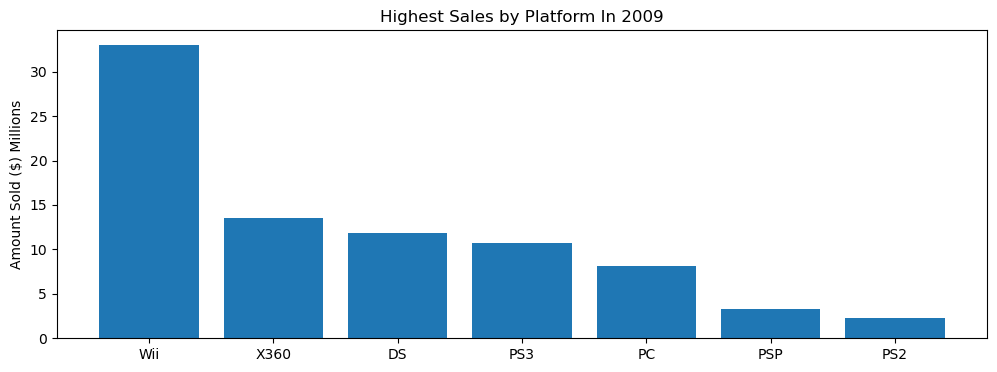

In [14]:
pub = df5['platform']
global1 = df5['global_sales']
plt.figure(figsize=(12,4))
plt.bar(pub, global1)

plt.ylabel('Amount Sold ($) Millions')
plt.title("Highest Sales by Platform In 2009")
plt.show()

In [15]:
df.year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: year, dtype: int64

In [16]:
plat_sales = df.groupby(['platform'])['global_sales'].sum().reset_index()
plat_sales = df.sort_values(by='global_sales', ascending=False)
plat_sales

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16189,16192,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.00,0.01,0.00,0.00,0.01


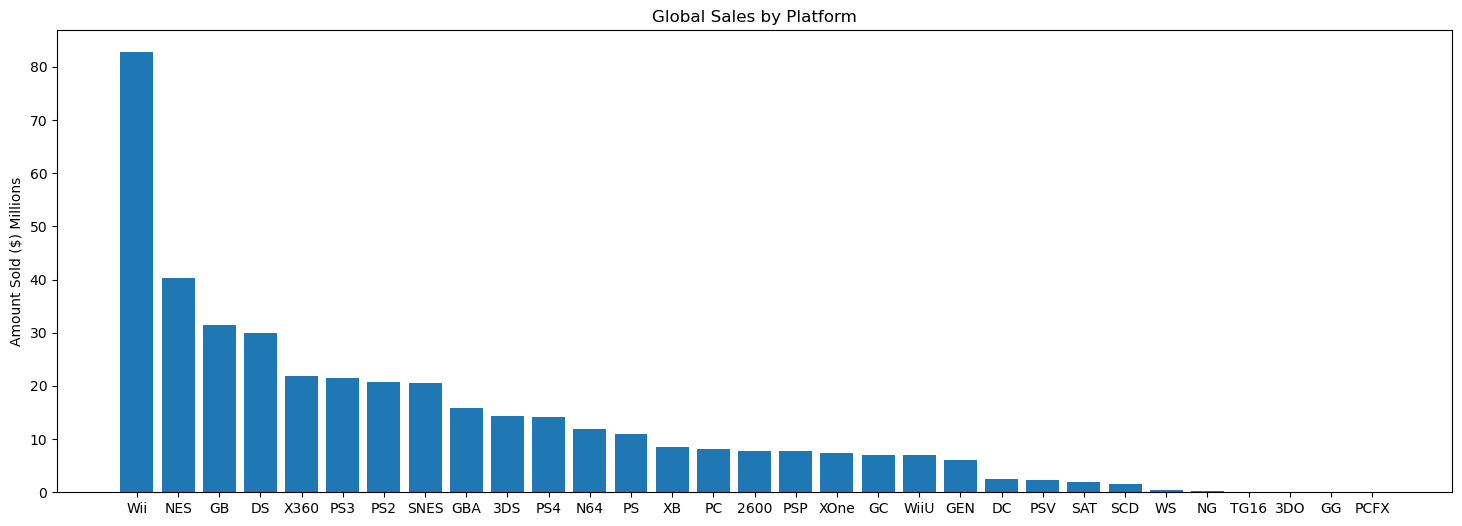

In [17]:
plat = plat_sales['platform']
glob = plat_sales['global_sales']
plt.figure(figsize=(18,6))

plt.bar(plat, glob)
plt.ylabel("Amount Sold ($) Millions")
plt.title("Global Sales by Platform")
plt.show()

In [18]:
dddf = df.query('platform == "Wii"')

In [19]:
dddf

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,Teenage Mutant Ninja Turtles,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16552,16555,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16573,16576,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


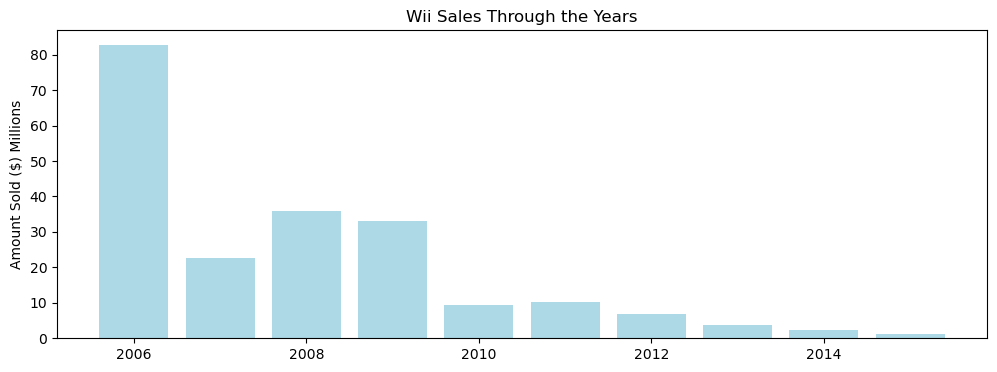

In [20]:
d1 = dddf.groupby(['year'])['global_sales'].sum().reset_index()

d2 = dddf['year']
d3 = dddf['global_sales']

plt.figure(figsize=(12,4))

plt.bar(d2, d3, color='lightblue')
plt.ylabel("Amount Sold ($) Millions")
plt.title("Wii Sales Through the Years")
plt.show()

In [21]:
dfff = df.query('name == "Call Of Duty%"')
dfff

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales


In [22]:
call_of_duty = df[df['name'].str.contains("Call of Duty")]
call_of_duty

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
61,62,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,10.21


In [23]:
call_duty = call_of_duty.groupby(['name'])['global_sales'].sum().reset_index()
call_dutyy = call_duty.sort_values(by='global_sales', ascending=True)
call_dutyy

,name,global_sales
13,Call of Duty: Modern Warfare Trilogy,0.04
17,Call of Duty: The War Collection,0.06
12,Call of Duty: Modern Warfare 3: Defiance,0.30
14,Call of Duty: Modern Warfare: Mobilized,0.43
15,Call of Duty: Modern Warfare: Reflex Edition,1.53
3,Call of Duty Black Ops: Declassified,1.69
19,Call of Duty: World at War Final Fronts,1.72
0,Call of Duty 2,2.08
16,Call of Duty: Roads to Victory,2.14
8,Call of Duty: Finest Hour,4.50


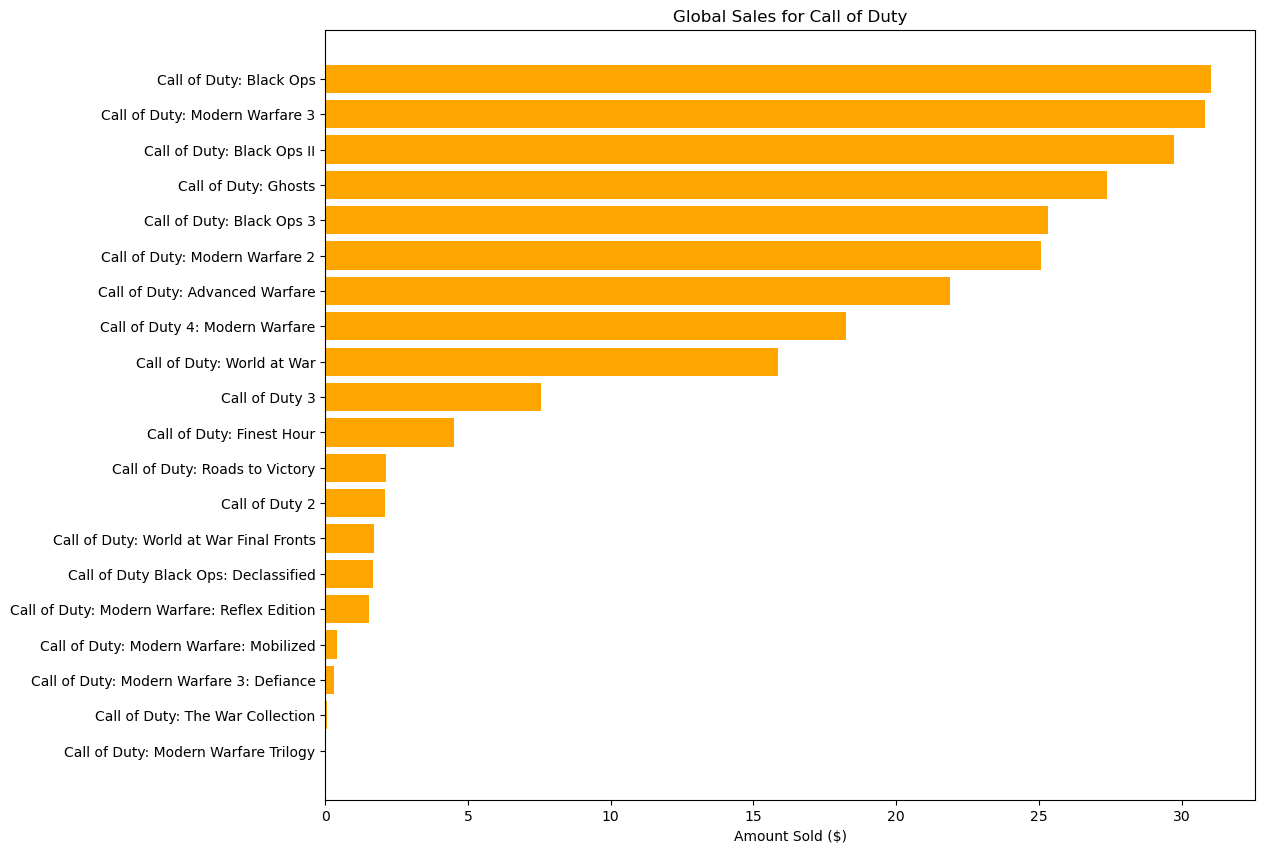

In [24]:
call_name = call_dutyy['name']
call_sales = call_dutyy['global_sales']

barplot = plt.figure(figsize=(12,10))

plt.barh(call_name, call_sales, color='orange')
#plt.xticks(rotation=55)
plt.xlabel("Amount Sold ($)")
plt.title("Global Sales for Call of Duty")
plt.show()

In [25]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [26]:
ps3 = df.query('platform == "PS3"')

In [27]:
ps3_sales = ps3.groupby(['platform', 'year'])['global_sales'].sum().reset_index()
ps3_saless = ps3_sales.sort_values(by='year', ascending=False)
ps3_saless

,platform,year,global_sales
10,PS3,2016.0,2.59
9,PS3,2015.0,18.22
8,PS3,2014.0,50.96
7,PS3,2013.0,117.39
6,PS3,2012.0,109.49
5,PS3,2011.0,159.37
4,PS3,2010.0,144.42
3,PS3,2009.0,132.34
2,PS3,2008.0,119.69
1,PS3,2007.0,73.81


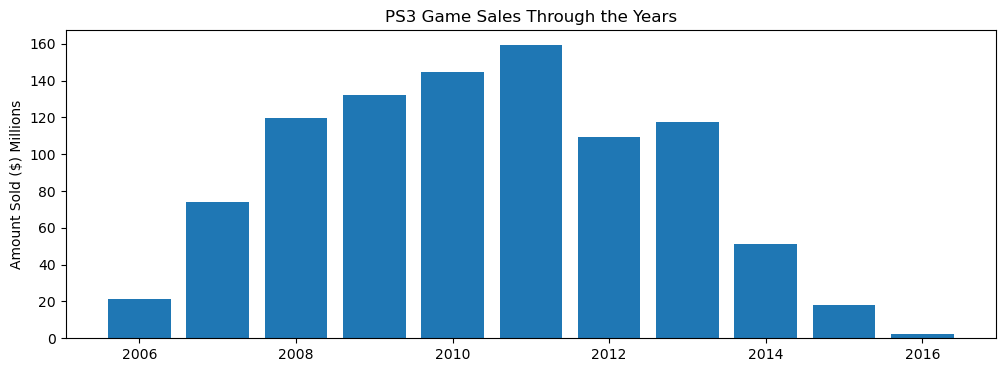

In [28]:
ps = ps3_saless['year']
ps_global = ps3_saless['global_sales']

plt.figure(figsize=(12,4))

plt.bar(ps, ps_global)
plt.ylabel("Amount Sold ($) Millions")
plt.title("PS3 Game Sales Through the Years")
plt.show()

In [29]:
nintendo = df.query('publisher == "Nintendo"')
nintendo

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [30]:
n1 = nintendo.groupby(['year'])['global_sales'].sum().reset_index()
n2 = n1.sort_values(by='year', ascending=False).head(11).reset_index()
n2


,index,year,global_sales
0,33,2016.0,3.47
1,32,2015.0,27.08
2,31,2014.0,48.65
3,30,2013.0,52.79
4,29,2012.0,56.47
5,28,2011.0,51.53
6,27,2010.0,61.07
7,26,2009.0,128.89
8,25,2008.0,91.22
9,24,2007.0,104.18


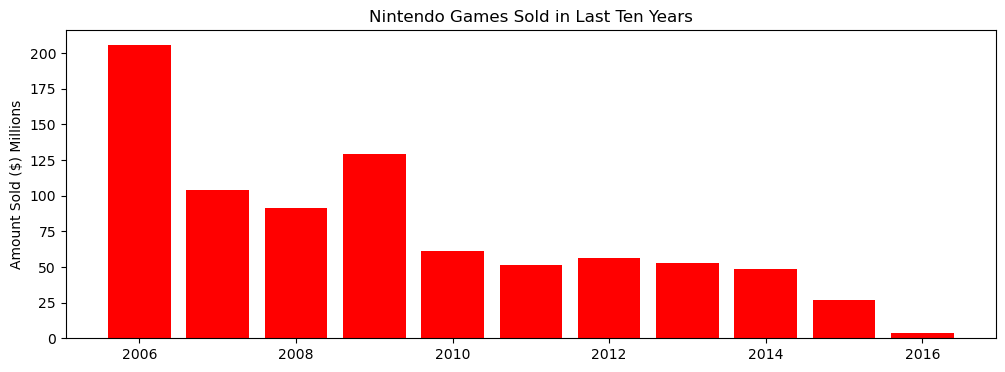

In [31]:
nin_year = n2['year']
nin_sales = n2['global_sales']

plt.figure(figsize=(12,4))

plt.bar(nin_year, nin_sales, color='red')
plt.ylabel("Amount Sold ($) Millions")
plt.title("Nintendo Games Sold in Last Ten Years")
plt.show()



In [32]:
df.name.value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: name, Length: 11493, dtype: int64

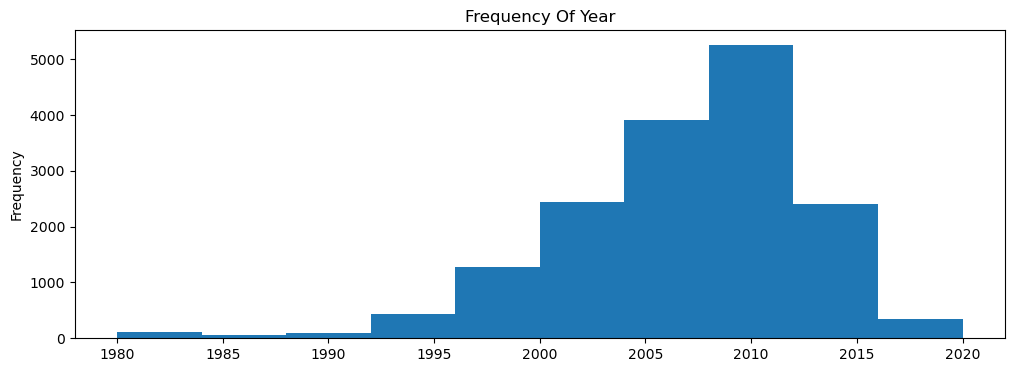

In [33]:
df['year'].plot(kind='hist',
                bins=10,
               title="Frequency Of Year",
               figsize=(12,4))
plt.show()

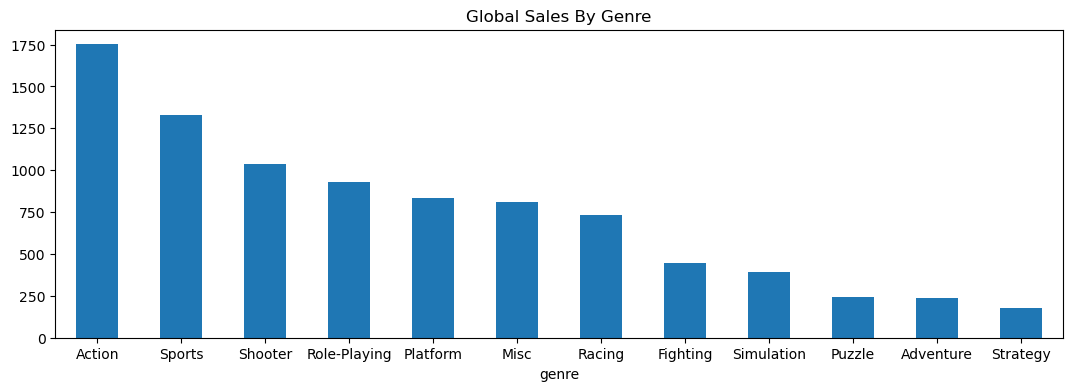

In [34]:
df.groupby('genre') \
    ['global_sales'].sum() \
    .sort_values(ascending=False) \
    .plot(kind='bar',
         title="Global Sales By Genre",
         figsize=(13,4),
         )
plt.xticks(rotation='horizontal')
plt.show()

<AxesSubplot:xlabel='na_sales', ylabel='eu_sales'>

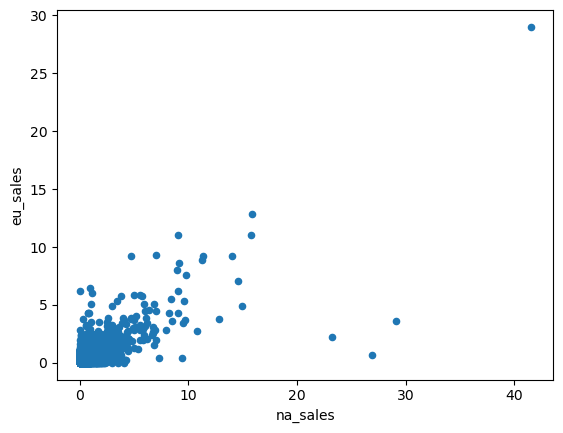

In [35]:
df.plot(x='na_sales',
        y='eu_sales',
       kind='scatter')